In [329]:
# Importing necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import re
from io import BytesIO
from PIL import Image
from bs4 import BeautifulSoup as bs

In [177]:
# Loading the fifa dataset
df = pd.read_csv('players_20.csv')

# Making a copy of the dataset
df_copy = df.copy()
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [178]:
# Extracting the image URL fom the player_url column by using RegularExpression
df['image_url'] = df['player_url'].str.extract(r'(https:\/\/sofifa.com\/player\/[0-9]+\/[a-zA-Z-]+\/)')
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,image_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2,https://sofifa.com/player/158023/lionel-messi/
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,https://sofifa.com/player/20801/c-ronaldo-dos-...
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3,https://sofifa.com/player/190871/neymar-da-sil...
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://sofifa.com/player/200389/jan-oblak/
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3,https://sofifa.com/player/183277/eden-hazard/


In [179]:
df[df['long_name'] == 'Eden Hazard']

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,image_url
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3,https://sofifa.com/player/183277/eden-hazard/


In [180]:
df.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 105 entries, sofifa_id to image_url
dtypes: float64(16), int64(45), object(44)
memory usage: 14.6+ MB


In [182]:
# Getting the columns of the data
columns = df.columns
columns = list(columns)
columns

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_re

In [183]:
# Grouping the dataframe by countries
nations = list(df['nationality'].unique())
nations
nation_count_dic = {}
nation_dic = {}
for nation in nations:
    nation_dic[nation] = df[df['nationality'] == nation]
   

# Getting the cout list of players for each countries     
for nation in nations:
    counts = len(nation_dic[nation])
    nation_count_dic[nation] = counts

nation_count_dic

{'Argentina': 886,
 'Portugal': 344,
 'Brazil': 824,
 'Slovenia': 61,
 'Belgium': 268,
 'Germany': 1216,
 'Netherlands': 416,
 'Croatia': 126,
 'Egypt': 30,
 'France': 984,
 'Senegal': 127,
 'England': 1667,
 'Spain': 1035,
 'Italy': 732,
 'Uruguay': 164,
 'Poland': 324,
 'Denmark': 345,
 'Gabon': 16,
 'Korea Republic': 322,
 'Costa Rica': 30,
 'Slovakia': 54,
 'Bosnia Herzegovina': 66,
 'Serbia': 139,
 'Scotland': 277,
 'Hungary': 35,
 'Switzerland': 229,
 'Greece': 96,
 'Austria': 319,
 'Morocco': 94,
 'Sweden': 358,
 'Wales': 117,
 'Colombia': 591,
 'Czech Republic': 102,
 'Chile': 370,
 'Algeria': 50,
 'Ivory Coast': 105,
 'Togo': 13,
 'Norway': 350,
 'Mexico': 340,
 'Iceland': 46,
 'Finland': 72,
 'Jamaica': 29,
 'Albania': 43,
 'Guinea': 35,
 'Cameroon': 78,
 'Ghana': 130,
 'Montenegro': 33,
 'Ukraine': 69,
 'Russia': 81,
 'DR Congo': 54,
 'Central African Rep.': 4,
 'Venezuela': 66,
 'Nigeria': 126,
 'Armenia': 8,
 'Israel': 16,
 'Ecuador': 53,
 'Paraguay': 80,
 'Australia': 196

In [184]:
# Grouping the dataframe by Clubs

clubs = list(df['club'].unique())
clubs
club_count_list = {}
club_dic = {}
for club in clubs:
    club_dic[club] = df[df['club'] == club]
club_dic['Chelsea']


# Getting the count list of players for each countries     
for club in clubs:
    counts = len(club_dic[club])
    club_count_list[club] = counts
club_count_list

{'FC Barcelona': 33,
 'Juventus': 33,
 'Paris Saint-Germain': 33,
 'Atlético Madrid': 33,
 'Real Madrid': 33,
 'Manchester City': 33,
 'Liverpool': 33,
 'Napoli': 31,
 'Tottenham Hotspur': 33,
 'Manchester United': 33,
 'Chelsea': 33,
 'FC Bayern München': 23,
 'Inter': 30,
 'Borussia Dortmund': 31,
 'Arsenal': 33,
 'Valencia CF': 33,
 'Lazio': 33,
 'Milan': 29,
 'Sporting CP': 30,
 'Olympique Lyonnais': 29,
 'RB Leipzig': 33,
 'Ajax': 30,
 'LA Galaxy': 27,
 'Atalanta': 28,
 'RC Celta': 33,
 'Bayer 04 Leverkusen': 25,
 'Real Betis': 31,
 'FC Porto': 30,
 'SV Werder Bremen': 32,
 'West Ham United': 33,
 'Wolverhampton Wanderers': 33,
 'AS Saint-Étienne': 32,
 'Torino': 29,
 'Dalian YiFang FC': 28,
 'Borussia Mönchengladbach': 33,
 'Roma': 31,
 'Guangzhou Evergrande Taobao FC': 28,
 'SL Benfica': 30,
 'Medipol Başakşehir FK': 30,
 'Everton': 33,
 'VfL Wolfsburg': 33,
 'Crystal Palace': 33,
 'Getafe CF': 30,
 'Shanghai SIPG FC': 28,
 'Eintracht Frankfurt': 33,
 'Olympique de Marseille': 2

In [185]:
right_list = []
left_list = []
foot_dict = {}
for club in clubs:
    foot = df[df["club"] == club]
    left_footer = foot[foot['preferred_foot'] == "Left"]
    right_footer = foot[foot['preferred_foot'] == "Right"]
    foot_dict['left_foot_players'] = left_footer
    foot_dict['right_foot_players'] = right_footer
    left_list.append(foot_dict['left_foot_players'])
    right_list.append(foot_dict['right_foot_players'])
right_list[11]

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,image_url
20,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,30,1988-08-21,184,80,Poland,FC Bayern München,...,62+3,62+3,62+3,61+3,58+3,57+3,57+3,57+3,58+3,https://sofifa.com/player/188545/robert-lewand...
31,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,33,1986-03-27,193,92,Germany,FC Bayern München,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://sofifa.com/player/167495/manuel-neuer/
52,189509,https://sofifa.com/player/189509/thiago-alcant...,Thiago,Thiago Alcântara do Nascimento,28,1991-04-11,174,70,Spain,FC Bayern München,...,78+3,78+3,78+3,78+3,75+3,69+3,69+3,69+3,75+3,https://sofifa.com/player/189509/thiago-alcant...
61,212622,https://sofifa.com/player/212622/joshua-kimmic...,J. Kimmich,Joshua Kimmich,24,1995-02-08,176,73,Germany,FC Bayern München,...,82+3,82+3,82+3,83+3,81+3,78+3,78+3,78+3,81+3,https://sofifa.com/player/212622/joshua-kimmich/
68,189242,https://sofifa.com/player/189242/philippe-cout...,Coutinho,Philippe Coutinho Correia,27,1992-06-12,172,68,Brazil,FC Bayern München,...,68+3,68+3,68+3,70+3,66+3,58+3,58+3,58+3,66+3,https://sofifa.com/player/189242/philippe-cout...
70,189596,https://sofifa.com/player/189596/thomas-muller...,T. Müller,Thomas Müller,29,1989-09-13,186,75,Germany,FC Bayern München,...,68+3,68+3,68+3,69+3,67+3,62+3,62+3,62+3,67+3,https://sofifa.com/player/189596/thomas-muller/
77,212190,https://sofifa.com/player/212190/niklas-sule/2...,N. Süle,Niklas Süle,23,1995-09-03,195,97,Germany,FC Bayern München,...,77+2,77+2,77+2,71+2,75+2,83+2,83+2,83+2,75+2,https://sofifa.com/player/212190/niklas-sule/
117,209658,https://sofifa.com/player/209658/leon-goretzka...,L. Goretzka,Leon Goretzka,24,1995-02-06,189,79,Germany,FC Bayern München,...,79+3,79+3,79+3,79+3,78+3,76+3,76+3,76+3,78+3,https://sofifa.com/player/209658/leon-goretzka/
119,213345,https://sofifa.com/player/213345/kingsley-coma...,K. Coman,Kingsley Coman,23,1996-06-13,179,75,France,FC Bayern München,...,54+2,54+2,54+2,59+2,55+2,43+2,43+2,43+2,55+2,https://sofifa.com/player/213345/kingsley-coman/
120,206113,https://sofifa.com/player/206113/serge-gnabry/...,S. Gnabry,Serge Gnabry,23,1995-07-14,175,75,Germany,FC Bayern München,...,62+2,62+2,62+2,66+2,62+2,53+2,53+2,53+2,62+2,https://sofifa.com/player/206113/serge-gnabry/


In [186]:
# Plotting functions for easier use and reusability

def barhplot(x, y, xlabel,ylabel, title):
    plt.figure(figsize=  (15, 8))
    plt.barh(x, y, align = 'center')
    plt.xticks(rotation=90)
    plt.gca().invert_yaxis()
    plt.xlabel(xlabel, fontsize = 16)
    plt.ylabel(ylabel, fontsize = 16)
    plt.title(title, fontsize = 16)
    plt.show();

def barplot(x, y, xlabel,ylabel, title):
    plt.figure(figsize=  (14, 7))
    plt.bar(x, y, align = 'center')
    plt.xlabel(xlabel, fontsize = 16)
    plt.ylabel(ylabel, fontsize = 16)
    plt.title(title, fontsize = 16)
    plt.show();

def lineplot(value, xlabel, ylabel, title):
    plt.figure(figsize=  (16, 8))
    plt.plot(value)
    plt.xlabel(xlabel, fontsize = 16)
    plt.ylabel(ylabel, fontsize = 16)
    plt.title(title, fontsize = 20)
    plt.show();

def sortby(column):
    data_1 = data.sort_values(by = column, ascending = False)
    return data

In [233]:
# Top 10 bayern munich Right footer ratings
bayern_munich_right = right_list[11][['overall','long_name']][:10]
bayern_munich_left = left_list[11][['overall','long_name']][:10]

92      David Olatukunbo Alaba
114            Lucas Hernández
3289           Alphonso Davies
3302          Mickaël Cuisance
Name: long_name, dtype: object

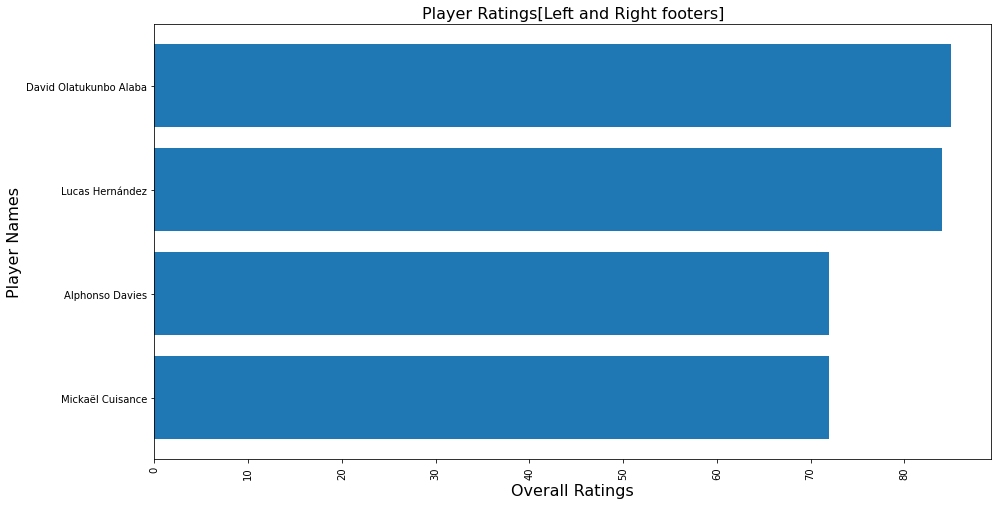

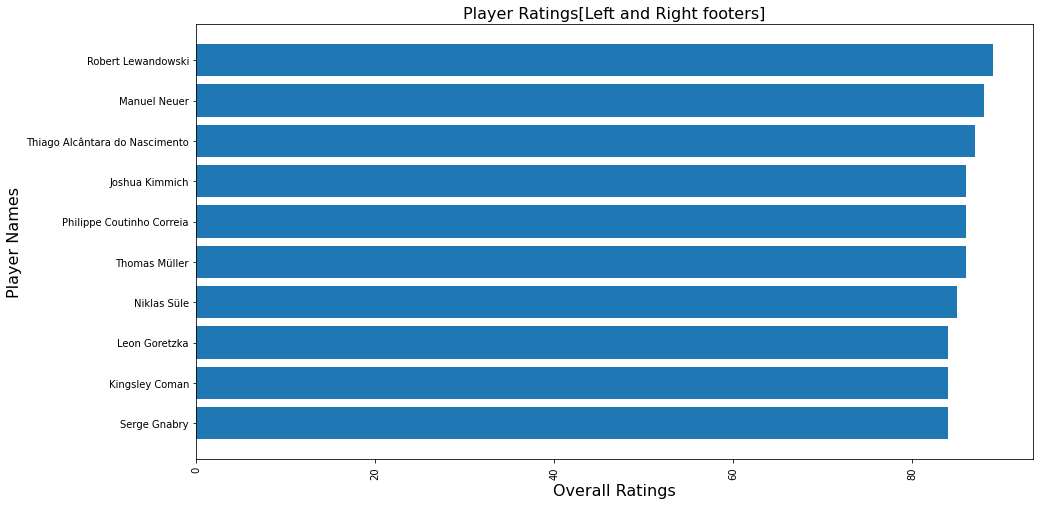

In [188]:
# plotting the right footer ratings

# extracting the names and the ratings from the dataframe
# Names
names_right = bayern_munich_right['long_name']
names_left = bayern_munich_left['long_name']

# Overall Ratings
rating_right = bayern_munich_right['overall']
rating_left = bayern_munich_left['overall']


# Changing the names into a list format
names_right = list(names_right)
names_left = list(names_left)


# Horizontal bar chart 
barhplot(names_left,rating_left,'Overall Ratings','Player Names','Player Ratings[Left and Right footers]')
barhplot(names_right,rating_right,'Overall Ratings','Player Names','Player Ratings[Left and Right footers]')

plt.show()


In [189]:
liverpool = df[df['club'] == "Liverpool"]
liverpool[liverpool['preferred_foot'] == "Left"]

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,image_url
9,209331,https://sofifa.com/player/209331/mohamed-salah...,M. Salah,Mohamed Salah Ghaly,27,1992-06-15,175,71,Egypt,Liverpool,...,67+3,67+3,67+3,70+3,66+3,57+3,57+3,57+3,66+3,https://sofifa.com/player/209331/mohamed-salah/
82,216267,https://sofifa.com/player/216267/andrew-robert...,A. Robertson,Andrew Robertson,25,1994-03-11,178,64,Scotland,Liverpool,...,80+2,80+2,80+2,83+2,82+2,77+2,77+2,77+2,82+2,https://sofifa.com/player/216267/andrew-robert...
313,193348,https://sofifa.com/player/193348/xherdan-shaqi...,X. Shaqiri,Xherdan Shaqiri,27,1991-10-10,169,72,Switzerland,Liverpool,...,66+3,66+3,66+3,67+3,63+3,55+3,55+3,55+3,63+3,https://sofifa.com/player/193348/xherdan-shaqiri/
10671,118794,https://sofifa.com/player/118794/andy-lonergan...,A. Lonergan,Andrew Lonergan,35,1983-10-19,192,87,England,Liverpool,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://sofifa.com/player/118794/andy-lonergan/
14637,247507,https://sofifa.com/player/247507/paul-glatzel/...,P. Glatzel,Paul Glatzel,18,2001-02-20,174,67,Germany,Liverpool,...,41+2,41+2,41+2,44+2,42+2,38+2,38+2,38+2,42+2,https://sofifa.com/player/247507/paul-glatzel/
14645,243056,https://sofifa.com/player/243056/adam-lewis/20...,A. Lewis,Adam Lewis,19,1999-11-08,175,63,England,Liverpool,...,57+2,57+2,57+2,58+2,58+2,57+2,57+2,57+2,58+2,https://sofifa.com/player/243056/adam-lewis/
15347,252302,https://sofifa.com/player/252302/yasser-larouc...,Y. Larouci,Yasser Larouci,18,2001-01-01,175,69,Algeria,Liverpool,...,55+2,55+2,55+2,58+2,58+2,56+2,56+2,56+2,58+2,https://sofifa.com/player/252302/yasser-larouci/


In [190]:
# # Creating a images folder
# folder = "players_images"
# if not os.path.exists(folder):
#     os.makedirs(folder)

# # Creating a function to extract the image from the image_url column
# def extract(url):
#     url = requests.get(url)
#     soup = bs(url.content,'lxml')
#     img = soup.find('div', attrs={'class':'bp3-card player'}).find('img')['data-srcset'].split(" ")[2]
#     url = requests.get(img)
#     name = soup.find('div', attrs={'class':'info'}).find('h1').get_text()
#     image = Image.open(BytesIO(url.content))
#     image.save(folder + "/" + "_" + name + '.' + 'png')


# #Running a for loop through the image list
# image_list = list(df['image_url'])
# for image in image_list:
#     extract(image)
    

In [394]:
# Best player in all clubs

# Initializing the dictionary
best_players_dic = {}
club_dic_keys = list(club_dic.keys())
club_dic_values = list(club_dic.values())
club_dic_item = list(club_dic.items())

#Gathering best players from each clubs
for key in club_dic_keys:
    best_player_rating = club_dic[key]['overall'].max()
    best_player = club_dic[key][club_dic[key]['overall'] == best_player_rating]['long_name']
    best_players_dic[key] = [best_player,best_player_rating]

# Player - rating dictionary
player_rating_dic = {}
player_name_list = []
player_rating_list = []
for key in best_players_dic:
    player_name = best_players_dic[key][0]
    player_name_list.append(str(player_name))
    player_rating = best_players_dic[key][1]
    player_rating_list.append(player_rating)

    
# Extracting and listing the player names into a new list
new_player_name_list = []
for player in player_name_list:
    player = re.findall(r'[a-zA-Z\D]+(?=\n)',player)
    new_player_name_list.append(player[0])

# Using the zip function and changing the list into a dictionary
player_ratings = dict(zip(new_player_name_list,player_rating_list))
player_ratings

{'    Lionel Andrés Messi Cuccittini': 94,
 '    Cristiano Ronaldo dos Santos Aveiro': 93,
 '    Neymar da Silva Santos Junior': 92,
 '    Jan Oblak': 91,
 '    Eden Hazard': 91,
 '    Kevin De Bruyne': 91,
 '         Virgil van Dijk': 90,
 '    Kalidou Koulibaly': 89,
 '    Harry Kane': 89,
 '    David De Gea Quintana': 89,
 "    N'Golo Kanté": 89,
 '    Robert Lewandowski': 89,
 '    Samir Handanovič': 88,
 '    Marco Reus': 88,
 '    Pierre-Emerick Aubameyang': 88,
 '    Daniel Parejo Muñoz': 86,
 '    Ciro Immobile': 86,
 '    Gianluigi Donnarumma': 85,
 '    Bruno Miguel Borges Fernandes': 85,
 '    Anthony Lopes': 85,
 '    Péter Gulácsi': 85,
 '    Hakim Ziyech': 85,
 '    Zlatan Ibrahimović': 85,
 '    Alejandro Darío Gómez': 85,
 '    Iago Aspas Juncal': 85,
 '    Kai Havertz': 84,
 '               Nabil Fekir': 84,
 '             Alex Nicolao Telles': 84,
 '    Jiří Pavlenka': 84,
 '    Felipe  Anderson Pereira Gomes': 84,
 '    João Filipe Iria Santos Moutinho': 84,
 '    St

In [192]:
# Best player in all countries